In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import seaborn as sns

In [2]:
%matplotlib notebook
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (5, 5)
np.set_printoptions(threshold=10, precision=6)

# Principal Component Analysis

### Generating 3-Dimensional Data 

In [3]:
def generate_3d_data(n, l=-100, h=100, m1=None, m2=None, c=None, s=2, seed=None):
    m1 = m1 if m1 else np.random.RandomState(seed).randn(1)
    m2 = m2 if m2 else np.random.RandomState(seed).randn(1)
    c = c if c else np.random.RandomState(seed).randint(l, h)
    x1 = np.random.uniform(l, h, n)
    x2 = np.random.uniform(l, h, n)
    x3 = m1 * x1 + m2 * x2 + c
    x3 += s * np.random.randn(n) * 10
    X = np.c_[x1, x2, x3]
    return X

In [4]:
X = generate_3d_data(200)
X

array([[ 43.474853, -56.971743,  97.038743],
       [-46.765291, -91.684977, 268.110155],
       [ 42.81611 ,  11.652672,   2.566617],
       ...,
       [-65.381707,  63.292593,  18.681744],
       [ 64.954065,  27.140451, -41.659767],
       [-52.252163,  82.817958, -63.861942]])

<IPython.core.display.Javascript object>


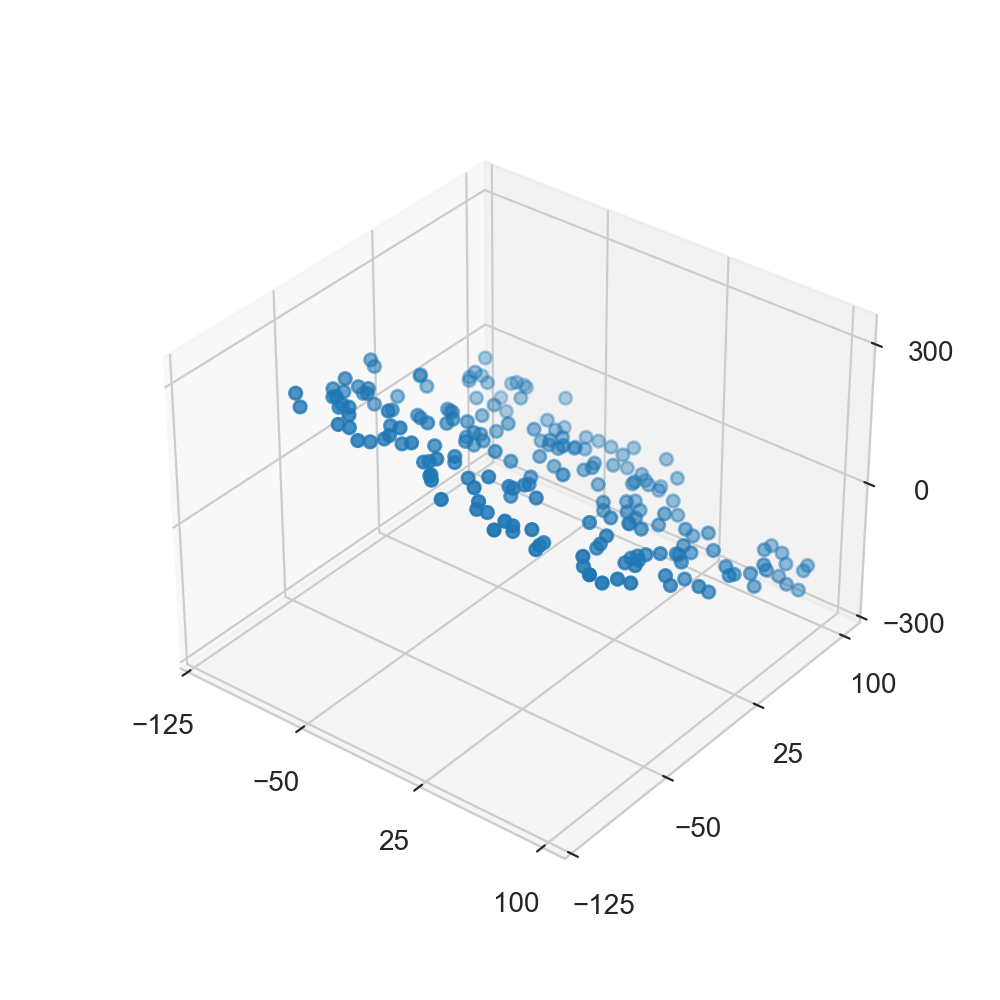

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], X[:, 2])
ax.set_xticks(ax.get_xticks()[::3])
ax.set_yticks(ax.get_yticks()[::3])
ax.set_zticks(ax.get_zticks()[::3]);

### Mean Normalization

In [6]:
normalize = lambda x : (x - np.mean(x, axis=0)) / (np.max(x, axis=0) - np.min(x, axis=0))

In [7]:
X_scaled = normalize(X)
X_scaled

array([[ 0.227672, -0.293617,  0.064666],
       [-0.230637, -0.4675  ,  0.376327],
       [ 0.224327,  0.050131, -0.107445],
       ...,
       [-0.325185,  0.308801, -0.078086],
       [ 0.33676 ,  0.127711, -0.188017],
       [-0.258503,  0.406606, -0.228465]])

In [8]:
X_scaled = X_scaled.T

<IPython.core.display.Javascript object>


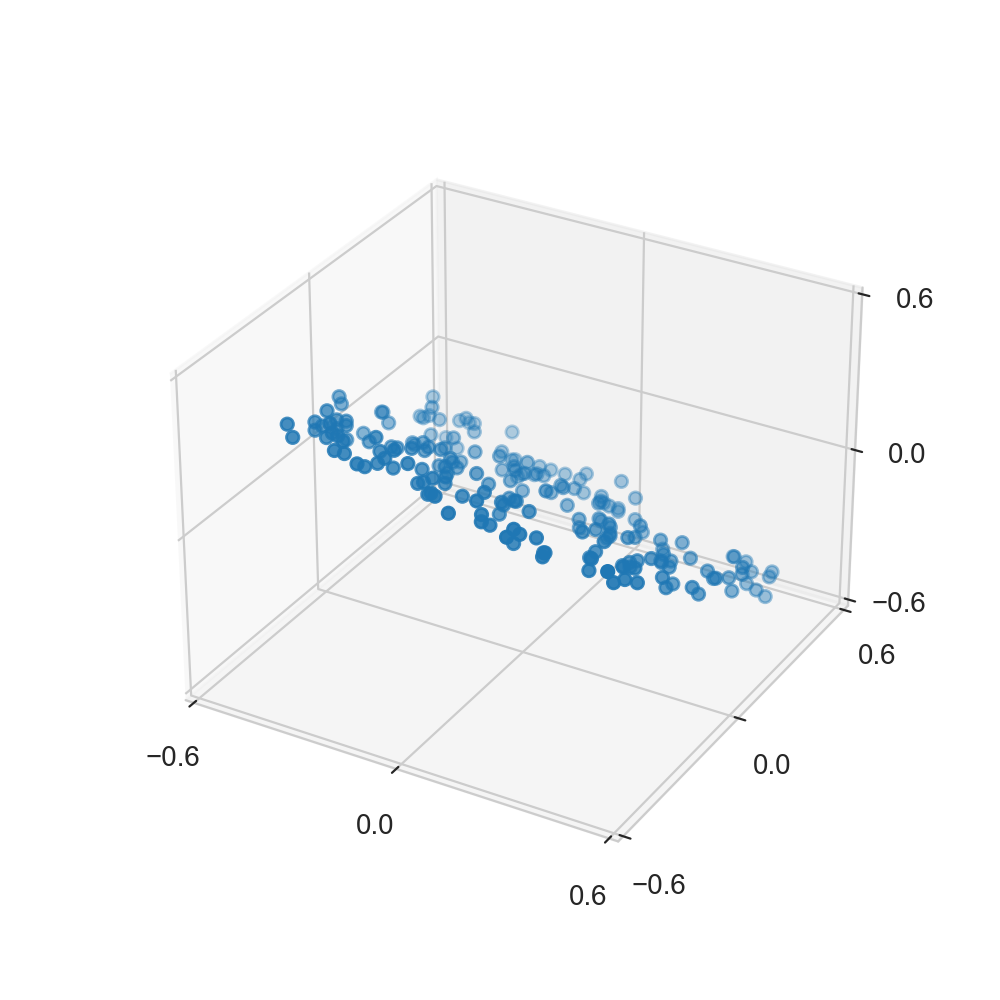

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(X_scaled[0], X_scaled[1], X_scaled[2])
ax.set_xticks(ax.get_xticks()[::3])
ax.set_yticks(ax.get_yticks()[::3])
ax.set_zticks(ax.get_zticks()[::3]);

### Covarience Matrix

In [10]:
cov_matrix = np.cov(X_scaled)
cov_matrix

array([[ 0.08781 ,  0.0033  , -0.029017],
       [ 0.0033  ,  0.086944, -0.060295],
       [-0.029017, -0.060295,  0.051189]])

### Eigen Values and Eigen Vectors

In [11]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)
eig_vectors

array([[ 0.245456, -0.892825,  0.377645],
       [ 0.54949 ,  0.449075,  0.704552],
       [ 0.798632, -0.034576, -0.600826]])

In [12]:
eig_values

array([0.000785, 0.085026, 0.140132])

In [13]:
order = eig_values.argsort()[::-1]

eig_values = eig_values[order]
eig_values

array([0.140132, 0.085026, 0.000785])

In [14]:
eig_vectors = eig_vectors[:, order]
eig_vectors

array([[ 0.377645, -0.892825,  0.245456],
       [ 0.704552,  0.449075,  0.54949 ],
       [-0.600826, -0.034576,  0.798632]])

### Number of Principal Components (K)

In [15]:
K = 2
components = eig_vectors[:, :K]
components

array([[ 0.377645, -0.892825],
       [ 0.704552,  0.449075],
       [-0.600826, -0.034576]])

In [16]:
components[:, 0][2]

-0.6008258975013275

<IPython.core.display.Javascript object>


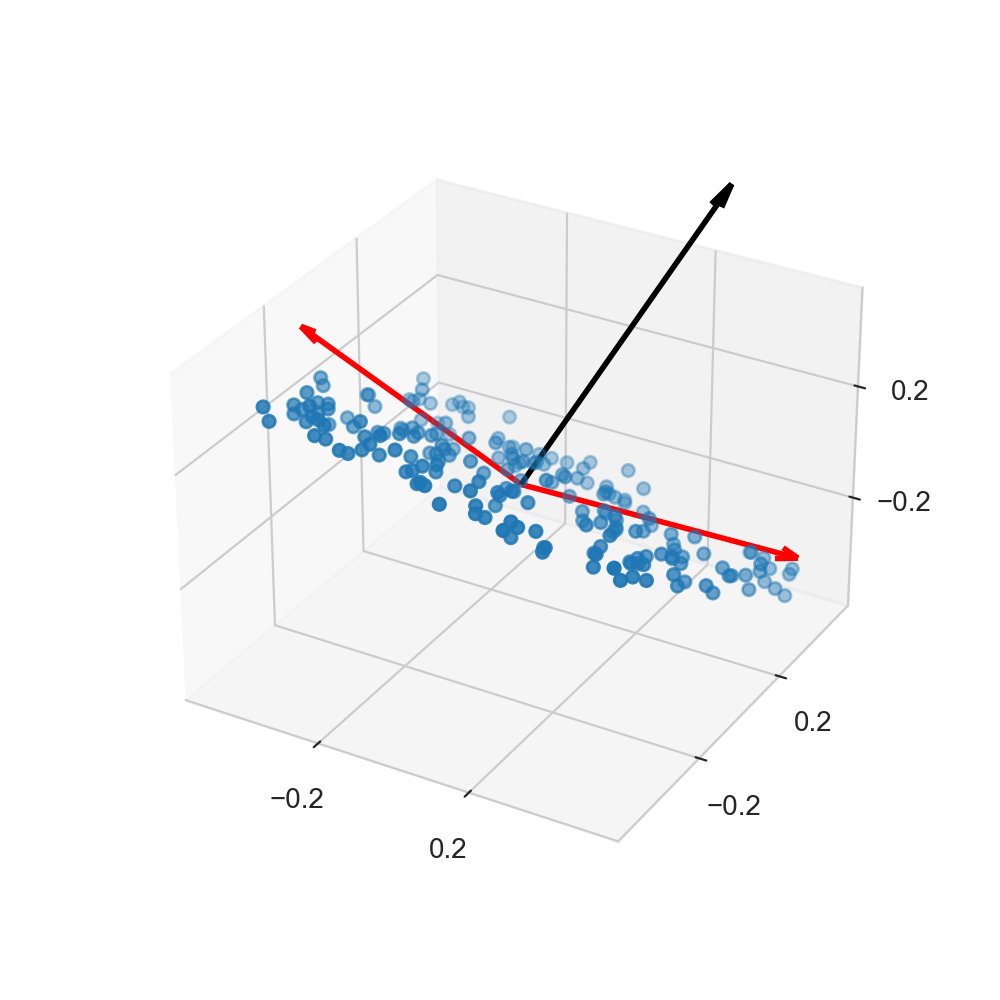

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_scaled[0], X_scaled[1], X_scaled[2])
ax.set_xticks(ax.get_xticks()[::2])
ax.set_yticks(ax.get_yticks()[::2])
ax.set_zticks(ax.get_zticks()[::2]);
for i in range(eig_vectors.shape[-1]):
    c = 'r' if i < K else 'k'
    ax.quiver(0, 0, 0, eig_vectors[:, i][0], eig_vectors[:, i][1], 
              eig_vectors[:, i][2], colors=c, arrow_length_ratio=0.075, lw=2)

### Dimesionality Reduction

In [18]:
X_scaled.shape

(3, 200)

In [19]:
X_reduced = components.T @ X_scaled
X_reduced

array([[-0.159742, -0.642583,  0.184591, ...,  0.141678,  0.33012 ,
         0.32612 ],
       [-0.337363, -0.017036, -0.174057, ...,  0.431708, -0.236815,
         0.421294]])

In [20]:
X_reduced.shape

(2, 200)

<IPython.core.display.Javascript object>


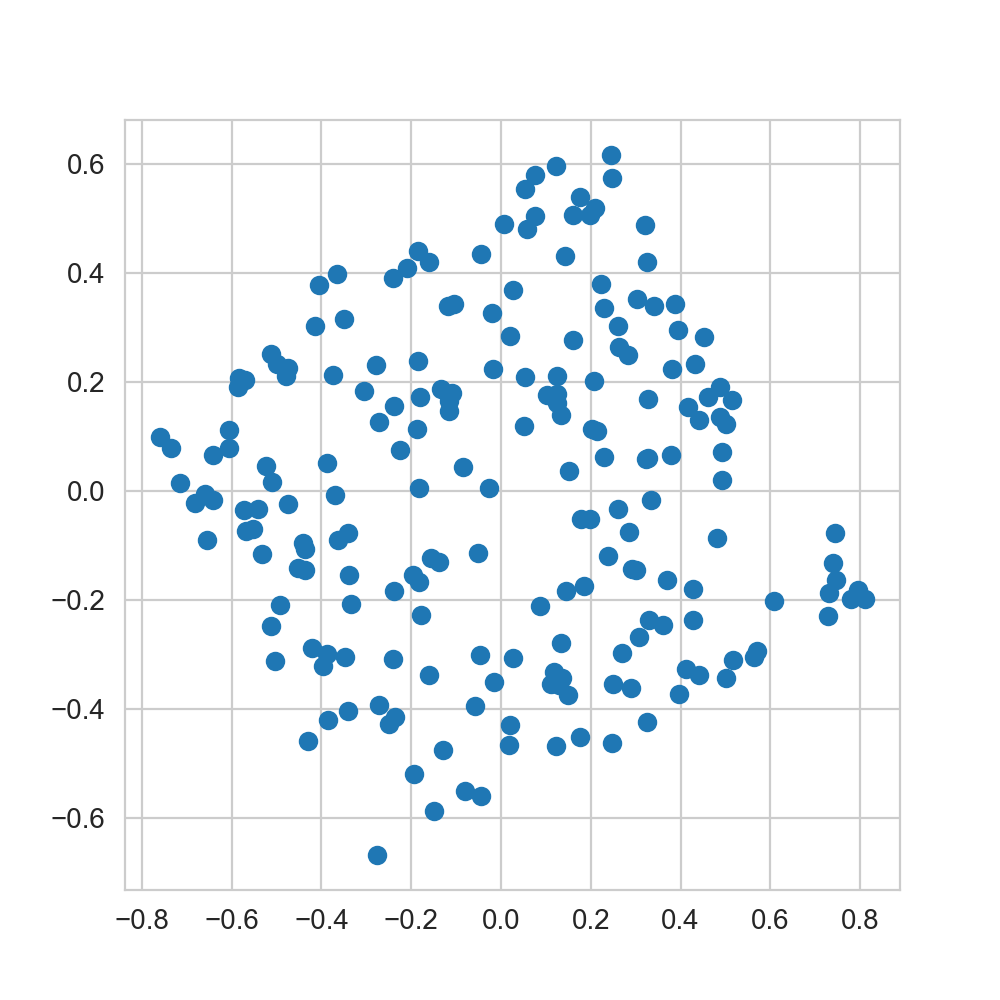

In [21]:
fig = plt.figure()
plt.scatter(x=X_reduced[0], y=X_reduced[1])

### Reconstruction from Compressed Representation

In [22]:
X_reduced.shape

(2, 200)

In [23]:
X_approx = components @ X_reduced

In [24]:
X_approx.shape

(3, 200)

<IPython.core.display.Javascript object>


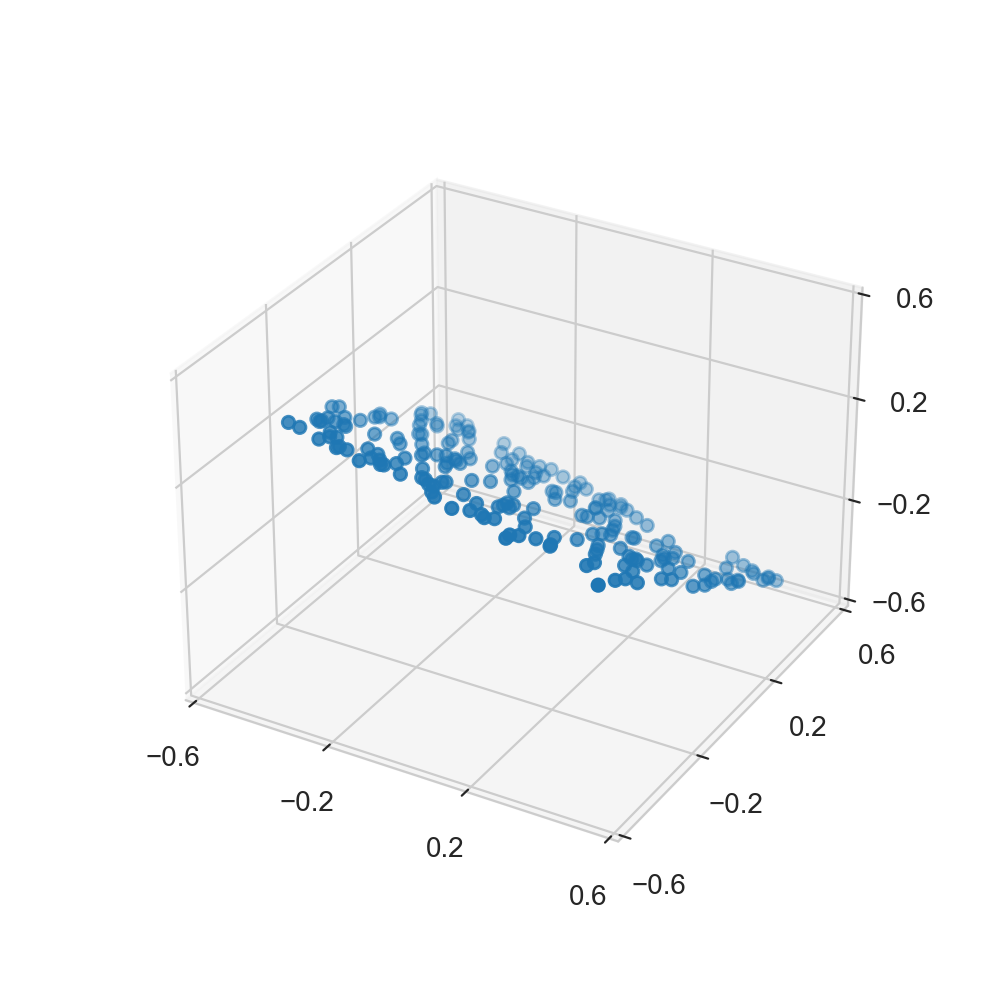

In [25]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_approx[0], X_approx[1], X_approx[2])
ax.set_xticks(ax.get_xticks()[::2])
ax.set_yticks(ax.get_yticks()[::2])
ax.set_zticks(ax.get_zticks()[::2]);

### Variance Retained

In [26]:
sk = ((X - X_approx.T) ** 2).sum(axis=0).mean()
sn = (X ** 2).sum(axis=0).mean()

var_percent = sk / sn * 100
print(f'{var_percent:.2f} % of Variance is Retained')

99.52 % of Variance is Retained


#### Alternate Efficient Method

In [27]:
sk = eig_values[:K].sum()
sn = eig_values.sum() 

var_percent = sk / sn * 100
print(f'{var_percent:.2f} % of Variance is Retained')

99.65 % of Variance is Retained
